Author(s): Piyush Amitabh

Details: this code reads zstacks of images, downsamples and saves them as a single tiff file

Created: July 05, 2022

License: GNU GPL v3.0

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skimage
from skimage import io
from PIL import Image, TiffTags
import tifffile as tiff

In [12]:
from tqdm import tqdm

# helper functions and constants

In [13]:
#function to enhance and show images
def show_image(img, img_title='', color=False, max_contrast=False):
    fig = plt.figure(figsize=(20,15))
    img = np.array(img)
    if max_contrast==True:
        enhance = skimage.exposure.equalize_hist(img)
    else:
        enhance = img
    if color==False:
        plt.imshow(enhance, cmap='gray')
    else:
        plt.imshow(enhance)
    plt.title(img_title)
    plt.colorbar()
    plt.axis("off")
    plt.show()

In [14]:
#find the stats of array (can take time)
def find_stats(ar):
    mean_xtrain = np.mean(ar)
    std_xtrain = np.std(ar)
    max_xtrain = np.max(ar)
    min_xtrain = np.min(ar)
    print(f'Stats: mean={mean_xtrain:.3f}, std={std_xtrain:.3f}, min={min_xtrain}, max={max_xtrain}')

The pixel spacing in this dataset is 1µm in the z (leading!) axis, and  0.1625µm in the x and y axes.

n is the downscaling factor in x and y, change it accordingly.

In [15]:
n = 4 #downscaling factor in x and y
zd, xd, yd = 1, 0.1625, 0.1625
orig_spacing = np.array([zd, xd, yd]) #change to the actual pixel spacing from the microscope
new_spacing = np.array([zd, xd*n, yd*n]) #downscale x&y by n

# Define folder structure

In [31]:
main_dir = '/media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/'
poses = ['Pos1/', 'Pos2/', 'Pos3/', 'Pos4/']
sub_dirs = ['snap/BF/', 'zStack/']
channels = ['GFP/', 'RFP/']
timepoints = [f'Timepoint{x}/Default/' for x in range(1, 16)]

In [32]:
save_path = '/home/piyush/Downloads/DATA/time lapse_063022/'

# Check Sample Image

(2160, 2560)

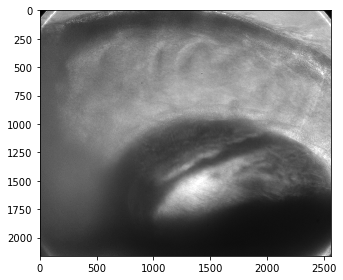

In [52]:
# check sample image
read_path = '/media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/Pos1/snap/BF/Timepoint1/Default/'
listfiles = []
for img_files in sorted(os.listdir(read_path)):
        if img_files.endswith(".tif"):
            listfiles.append(img_files)
     
first_image = tiff.imread(read_path+listfiles[0])

io.imshow(first_image)

first_image.shape

# Downsample and Save all Images

In [74]:
def read_zstack(read_path):
    listfiles =[]
    for img_files in sorted(os.listdir(read_path)):
        if img_files.endswith(".tif"):
            listfiles.append(img_files)
    stack_full = np.zeros((len(listfiles),first_image.shape[0]//n,first_image.shape[1]//n))#,np.uint16)
    
    for i, val in enumerate(listfiles):
        print(f'Reading: {read_path+val}')
        img = tiff.imread(read_path+val)
        img_downscaled = skimage.transform.downscale_local_mean(img, (n, n)) #use a kernel of nxn, this will downscale by a factor of n in both x & y
        stack_full[i,:,:] = img_downscaled
    print(f'Shape of image {stack_full.shape}')
    if stack_full.shape[0]==1: #single page image, e.g. BF image
        return(np.squeeze(stack_full, axis=0))
    else: #image zstack, multi-page tiff
        return(stack_full)

In [75]:
for pos in poses: 
    for sub_dir in sub_dirs:
        for channel in channels:
            for tp in timepoints:
                if 'BF' in sub_dir: #check if its brightfield folder
                    read_path = main_dir + pos + sub_dir + tp
                    save_name = tp[:-9]+'_'+pos[:-1]+'_'+'BF'+'.tif'
                else:
                    read_path = main_dir + pos + sub_dir + channel + tp
                    save_name = tp[:-9]+'_'+pos[:-1]+'_'+channel[:-1]+'.tif'
                # print(read_path)
                # os.chdir(save_path)
                # img_stack = Image.fromarray(read_zstack(read_path))
                tiff.imwrite(save_path+save_name, read_zstack(read_path))

Reading: /media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/Pos1/snap/BF/Timepoint1/Default/img_channel000_position000_time000000000_z000.tif
Shape of image (1, 540, 640)
Reading: /media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/Pos1/snap/BF/Timepoint2/Default/img_channel000_position000_time000000000_z000.tif
Shape of image (1, 540, 640)
Reading: /media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/Pos1/snap/BF/Timepoint3/Default/img_channel000_position000_time000000000_z000.tif
Shape of image (1, 540, 640)
Reading: /media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/Pos1/snap/BF/Timepoint4/Default/img_channel000_position000_time000000000_z000.tif
Shape of image (1, 540, 640)
Reading: /media/piyush/Elements/time lapse_063022/fish2/Acquisition/Sample1/Pos1/snap/BF/Timepoint5/Default/img_channel000_position000_time000000000_z000.tif
Shape of image (1, 540, 640)
Reading: /media/piyush/Elements/time lapse_063022/fish2/Acquisiti

OSError: [Errno 28] No space left on device

---

# Appendix

check different downscaling algorithms

In [14]:
# from skimage.transform import rescale, resize, downscale_local_mean

# image = tiff.imread(dir+listfiles[250])


# image_rescaled = rescale(image, 0.25, anti_aliasing=False)
# image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
#                        anti_aliasing=True)
# image_downscaled = downscale_local_mean(image, (4, 4))

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

# ax = axes.ravel()

# ax[0].imshow(image, cmap='gray')
# ax[0].set_title("Original image")

# ax[1].imshow(image_rescaled, cmap='gray')
# ax[1].set_title("Rescaled image (aliasing)")

# ax[2].imshow(image_resized, cmap='gray')
# ax[2].set_title("Resized image (no aliasing)")

# ax[3].imshow(image_downscaled, cmap='gray')
# ax[3].set_title("Downscaled image (no aliasing)")

# ax[0].set_xlim(0, 512)
# ax[0].set_ylim(512, 0)
# plt.tight_layout()
# plt.show()
# io.imsave('./rescaled_alias.png', image_rescaled)
# io.imsave('./resized_no alias.png', image_resized)
# io.imsave('./downscaled_mean.png', image_downscaled)